In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
x1 = tf.constant(5)
x2 = tf.constant(6)

result =tf.multiply(x1,x2)    #  tf.matmul(x1,x2)
print(result)

Tensor("Mul:0", shape=(), dtype=int32)


In [4]:
sess =tf.Session()
print(sess.run(result))
sess.close()

30


In [5]:
with tf.Session() as sess:
    output=sess.run(result)
    print(output)

30


In [14]:
print(output)
print(tf.__version__)

30
1.15.0


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:


data =keras.datasets.mnist

(train_img, train_labels), (test_img, test_labels) =data.load_data()

class_names =["T-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "Shirt", "Sneaker", "bag", "ankle boot"]

# print(train_img[7])


11493376/11490434 [==============================] - 0s 0us/step


In [51]:
train_img.shape

(60000, 28, 28)

In [52]:
len(train_labels)

60000

In [53]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
test_img.shape

(10000, 28, 28)

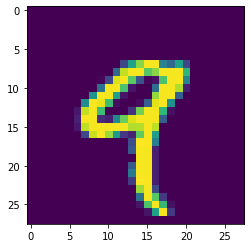

In [62]:
plt.imshow(train_img[4])
plt.show()

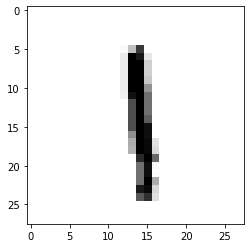

In [64]:
plt.imshow(train_img[8], cmap=plt.cm.binary)


In [24]:
train_img =train_img/255.0
test_img =test_img/255.0

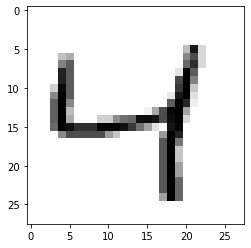

In [61]:
plt.imshow(train_img[2], cmap=plt.cm.binary)


In [85]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_img, train_labels, epochs=10)

test_loss, test_acc =model.evaluate(test_img, test_labels)

print("Test acc: ", test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 2.2167 - acc: 0.7628
Epoch 2/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.5543 - acc: 0.8557
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4532 - acc: 0.8796
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4136 - acc: 0.8903
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3802 - acc: 0.9014
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3573 - acc: 0.9068
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3531 - acc: 0.9090
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3382 - acc: 0.9122
Epoch 9/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3279 - acc: 0.9172
Epoch 10/10
10000/10000 [==============================] 

In [74]:
prediction =model.predict(test_img)
print(prediction)

[[4.6503851e-12 1.0742845e-07 3.0210074e-07 ... 9.9999940e-01
  3.3320096e-09 5.5556781e-11]
 [9.5327437e-08 9.1291593e-05 9.9709058e-01 ... 1.2515193e-15
  9.8300438e-07 3.2595181e-17]
 [3.2024515e-11 9.9998367e-01 4.5788056e-06 ... 1.1050254e-06
  7.5432121e-07 3.9056245e-12]
 ...
 [1.1642152e-13 9.2616121e-14 1.0010563e-09 ... 2.0021321e-06
  5.0349094e-08 2.1212838e-04]
 [4.3747508e-09 2.0997424e-27 1.6292149e-29 ... 4.0292939e-06
  1.4548805e-10 8.5688200e-11]
 [5.4934244e-09 6.6452895e-18 7.1284700e-07 ... 1.4550080e-23
  9.9809951e-14 4.9362523e-17]]


In [75]:
print(prediction[0])

[4.6503851e-12 1.0742845e-07 3.0210074e-07 1.5019332e-07 8.8747293e-15
 2.0015922e-10 1.7723908e-16 9.9999940e-01 3.3320096e-09 5.5556781e-11]


1


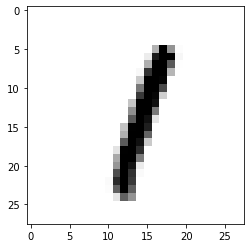

In [82]:
print(np.argmax(prediction[5]))
plt.imshow(test_img[5], cmap=plt.cm.binary)


In [80]:
print(np.argmax(prediction[1]))

2


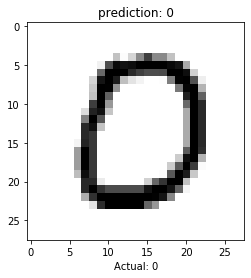

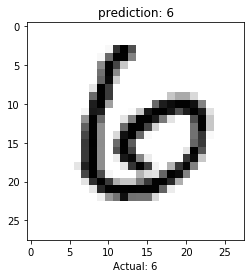

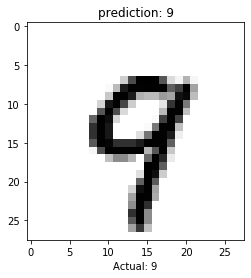

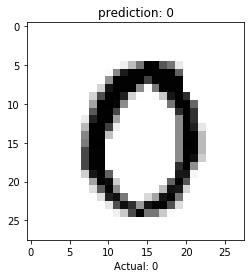

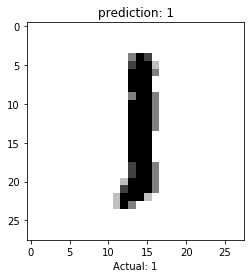

In [83]:
for i in range(10,15):
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: "+ str(test_labels[i]))
    plt.title("prediction: "+ str(np.argmax(prediction[i])))
    plt.show()

In [86]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
